# PCA Experiment

Andrew McDonald // CSE 847 // 19 April 2021

Principal component analysis linearly projects data onto a low-dimensional subspace while maximizing preserved variance. If ${\bf x}$ denotes a vector drawn from the distribution of our dataset, and $S$ denotes the sample covariance matrix of our dataset, we seek a vector ${\bf v}$ satisfying

$$\max_{\bf v} \text{Var}[{\bf v}^{\top} {\bf x}] = \max_{\bf v} {\bf v}^{\top} S {\bf v} \quad \text{s.t.} \quad \|{\bf v}\|_2 = 1$$

as the first principal component, since the 1D projection of our data onto such a ${\bf v}$ will preserve maximum variance. Formulating this constrained optimization problem as an unconstrained problem with a Lagrangian multiplier gives

$$L({\bf v}, \lambda) = {\bf v}^{\top} S {\bf v} + \lambda({\bf v}^{\top}{\bf v} - 1)$$

and setting the gradient of this expression with respect to ${\bf v}$ equal to zero shows ${\bf v}$ must be an eigenvector of $S$. Since our goal is to maximize ${\bf v}^{\top} S {\bf v}$, then, we take the eigenvector corresponding to the largest eigenvalue to be the first principal component. Subsequent principal components correspond to the next-largest eigenvectors, and form an orthogonal set along which variance is maximized in each dimension.

#### Experiment: Principal Component Analysis
Here, we implement PCA using SVD and evaluate the reconstruction error for parameterizations of $p=10,50,100,200$ principal components. We leverage a subset of the standard [USPS digit dataset](http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#usps) to evaluate our implementation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA   # for comparison purposes only

#### Toy PCA-by-hand Example from Homework

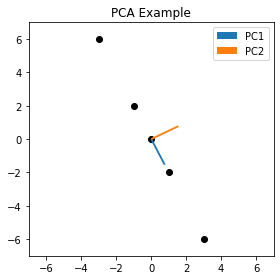

In [2]:
X = np.array([[0, 0], [-1, 2], [-3, 6], [1, -2], [3, -6]])

cmap = plt.get_cmap("tab10")
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x=X[:, 0], y=X[:, 1], c="k")
ax.quiver(0, 0, 1, -2, color=cmap(0), headwidth=0, label="PC1",
          scale_units="xy", scale=1, angles="xy")
ax.quiver(0, 0, 2, 1, color=cmap(1), headwidth=0, label="PC2",
          scale_units="xy", scale=1, angles="xy")
ax.set_title("PCA Example")
ax.legend()
ax.set_xlim((-7, 7))
ax.set_ylim((-7, 7))
fig.tight_layout()
fig.savefig("img/pca_example.png")
plt.show()

#### Implement and Validate PCA

In [3]:
def pca(X):
    """
    Perform principal component analysis with SVD on the data matrix X.
    Center the data, compute SVD, return principal component vectors and coordinates.

    :param X: [N x d numpy array] data matrix to be decomposed.
    :return: [tuple] of length 2, where
        [0]: [d x d numpy array] of principal component vectors as columns.
        [1]: [N x d numpy array] of coordinates with respect to principal component vectors.
    """
    # center data by subtracting feature means
    X_centered = X - np.mean(X, axis=0)

    # compute SVD of centered data matrix
    U, S, VT = np.linalg.svd(X_centered)

    # pc's are columns of V=VT.T matrix
    principal_components = VT.T

    # reshape S into full-size diagonal matrix and multiply with U to get coordinates
    S = np.pad(S, (0, U.shape[1] - len(S)))
    coordinates = np.dot(U, np.diag(S))
    return principal_components, coordinates

In [4]:
generator = multivariate_normal(mean=[0,0], cov=[[1,0.5],[0.5,1]])
X = generator.rvs(100, random_state=847)
principal_components, coordinates = pca(X)
print(f"Principal Components (custom implementation):\n{principal_components}")
sk_pca = PCA()
sk_pca.fit(X)
sk_principal_components = sk_pca.components_
print(f"Principal Components (sklearn):\n{sk_principal_components}")

Principal Components (custom implementation):
[[ 0.6372459  -0.77066054]
 [ 0.77066054  0.6372459 ]]
Principal Components (sklearn):
[[ 0.6372459   0.77066054]
 [ 0.77066054 -0.6372459 ]]


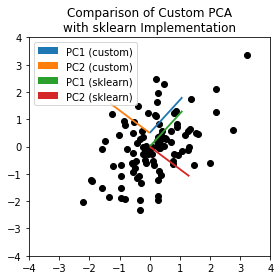

In [5]:
cmap = plt.get_cmap("tab10")
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x=X[:, 0], y=X[:, 1], c="k")
ax.quiver(0, 0.5, principal_components[0, 0], principal_components[1, 0], color=cmap(0),
          scale_units="xy", scale=0.5, angles="xy", headwidth=0, label="PC1 (custom)")
ax.quiver(0, 0.5, principal_components[0, 1], principal_components[1, 1], color=cmap(1),
          scale_units="xy", scale=0.5, angles="xy", headwidth=0, label="PC2 (custom)")
ax.quiver(0, 0, sk_principal_components[0, 0], sk_principal_components[1, 0], color=cmap(2),
          scale_units="xy", scale=0.5, angles="xy", headwidth=0, label="PC1 (sklearn)")
ax.quiver(0, 0, sk_principal_components[0, 1], sk_principal_components[1, 1], color=cmap(3),
          scale_units="xy", scale=0.5, angles="xy", headwidth=0, label="PC2 (sklearn)")
ax.set_title("Comparison of Custom PCA\nwith sklearn Implementation")
ax.legend()
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
fig.tight_layout()
fig.savefig("img/pca_implementation.png")
plt.show()

#### USPS Experiment

In [6]:
usps_X = np.loadtxt("usps_X.csv", delimiter=",")
usps_y = np.loadtxt("usps_y.csv", delimiter=",")
usps_X.shape, usps_y.shape

((3000, 256), (3000,))

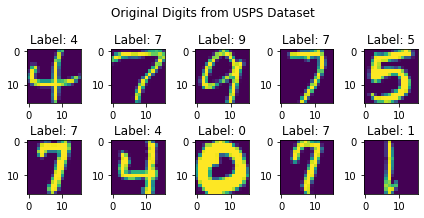

In [7]:
np.random.seed(847)
fig, ax = plt.subplots(2, 5, figsize=(6, 3))
sample = np.random.choice(usps_X.shape[0], 10, replace=False)
ax = ax.flatten()
for i in range(10):
    img = usps_X[sample[i]].reshape(16, 16)
    ax[i].imshow(img)
    ax[i].set_title(f"Label: {int(usps_y[sample[i]])}")
fig.suptitle("Original Digits from USPS Dataset")
fig.tight_layout()
fig.savefig("img/usps_original.png")
plt.show()

Rank  10 Reconstruction Error: 452262.0241235362
                         Mean: 150.75400804117874
Rank  50 Reconstruction Error: 337935.41471987095
                         Mean: 112.64513823995698
Rank 100 Reconstruction Error: 311196.3624413288
                         Mean: 103.73212081377628
Rank 200 Reconstruction Error: 298281.9643997667
                         Mean: 99.42732146658891


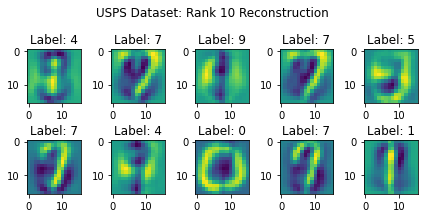

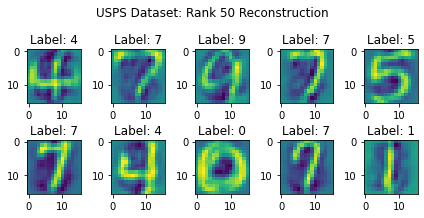

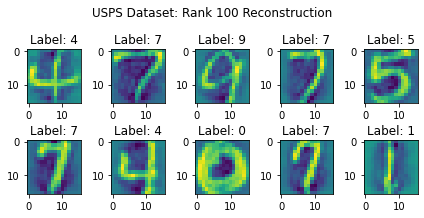

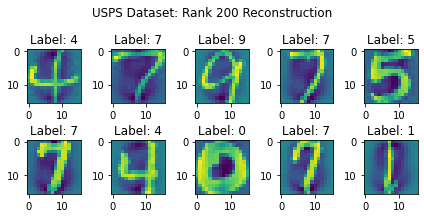

In [8]:
ranks = [10, 50, 100, 200]
principal_components, coordinates = pca(usps_X)
for p in ranks:
    # take first p columns of each matrix
    pc, co = principal_components[:, :p], coordinates[:, :p]

    # pc is d x p and coordinates is N x p --> need N x d
    reconstructed = np.dot(co, pc.T)

    # reconstruction error is squared Frobenius norm
    error = np.linalg.norm(usps_X - reconstructed, ord="fro")**2
    print(f"Rank {p:3} Reconstruction Error: {error}")
    print(f"                         Mean: {error/usps_X.shape[0]}")

    fig, ax = plt.subplots(2, 5, figsize=(6, 3))
    ax = ax.flatten()
    for i in range(10):
        img = reconstructed[sample[i]].reshape(16, 16)
        ax[i].imshow(img)
        ax[i].set_title(f"Label: {int(usps_y[sample[i]])}")
    fig.suptitle(f"USPS Dataset: Rank {p} Reconstruction")
    fig.tight_layout()
    fig.savefig(f"img/usps_rank_{p}.png")
    plt.show()